In [3]:
import re
import numpy as np
from math import sqrt


In [4]:
tide_heights = []

In [5]:
with open("2021LEI.txt") as f:
    for line in f:
        if line.strip():
            l = line.split()
            h = float(re.sub("[A-Z]", "", l[3]))
            tide_heights.append(float(re.sub("[A-Z]", "", l[3])))
    

 25359) 2021/09/22 03:30:00 is changed to the average of the before and after because this is clearly an outlier

In [6]:
N = len(tide_heights)

In [7]:
import matplotlib.pyplot as plt

In [12]:
t = 15 * 60

In [13]:
efficiency = 0.9

In [14]:
rho_water = 997

In [15]:
gravity_earth = 9.8

In [16]:
out_max_efficienty = 16/27

In [17]:
energy_need_total = 7.14E8 * 1000 * 3600

In [18]:
print(f"{energy_need_total:e}")

2.570400e+15


In [19]:
average_power_needed = energy_need_total / 31536000

In [20]:
average_power_needed

81506849.3150685

In [21]:
size_of_lagoon = 2E7

In [22]:
average_power_needed

81506849.3150685

In [23]:
starts = [-1]
ends = []
con_max = -1
con_min = -1
con_max_count = 0
con_min_count = 0

In [24]:
for t in range(N-15):
    now_max = float('-inf')
    now_min = float('inf')
    for i in range(t, t+15):
        now_max = max(now_max, tide_heights[i])
        now_min = min(now_min, tide_heights[i])
    if now_max == con_max:
        con_max_count += 1
    else:
        con_max = now_max
        con_max_count = 1
    if now_min == con_min:
        con_min_count += 1
    else:
        con_min = now_min
        con_min_count = 1
    if con_max_count == 15 or con_min_count == 15:
        starts.append(t)
        ends.append(t)

In [25]:
start, end = 4800, 5000

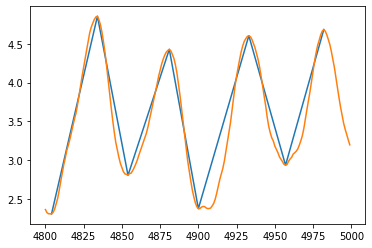

In [26]:
plt.plot([i for i in ends if start <= i < end], [tide_heights[i] for i in ends if start <= i < end])
plt.plot(np.arange(start, end), tide_heights[start:end])

In [27]:
dt = [ends[i+1] - ends[i] for i in range(len(ends) - 1)]

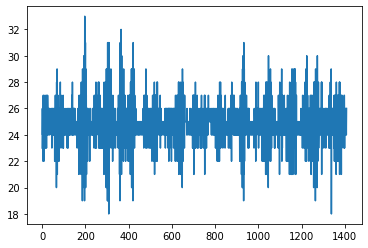

In [28]:
plt.plot(np.arange(0, len(dt)), dt)

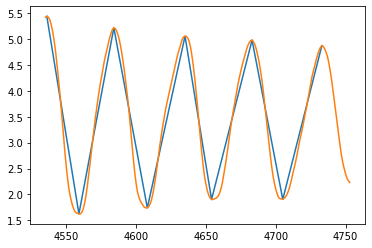

In [31]:
for j in range(len(dt)):
    if dt[j]<20:
        start = ends[j]-100
        end = ends[j] + dt[j]+100
        plt.plot([i for i in ends if start <= i < end], [tide_heights[i] for i in ends if start <= i < end])
        plt.plot(np.arange(start, end), tide_heights[start:end])
        break

In [32]:
from math import pi, sin, cos

In [33]:
total_energy = 0
for i in range(len(dt)):
    total_energy += pi / 2 / 4 * (tide_heights[ends[i + 1]] - tide_heights[ends[i]]) ** 2 * size_of_lagoon * rho_water * gravity_earth

In [34]:
print(f"{total_energy:e}")

1.585424e+15


In [35]:
coefficients = [0] * 365

In [36]:
for i in range(len(dt)):
    amplitude = 1/2 * (tide_heights[ends[i + 1]] - tide_heights[ends[i]])
    coefficients[ends[i] // (24*4)] += pi / 2 * amplitude ** 2 * rho_water * gravity_earth
    if True and (ends[i] // (24*4)) != (ends[i+1] // (24 * 4)):
        end_of_day = ends[i+1] // (24 * 4) * (24 * 4)
        phase = pi * (end_of_day - ends[i]) / (ends[i+1] - ends[i])
        previous_day = ends[i] // (24*4) 
        next_day = (ends[i] // (24*4)) + 1
        part_over = (pi / 2 - 1/4*(2*phase + sin(2*phase) + cos(2*phase) - 1)) * amplitude ** 2 * rho_water * gravity_earth
        coefficients[previous_day] -= part_over
        coefficients[next_day] += part_over
        

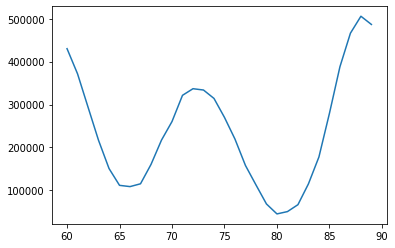

In [37]:
plt.plot(np.arange(60, 90), coefficients[60:90])

Text(0, 0.5, 'Energy Coefficient ($J$ / $m^2$)')

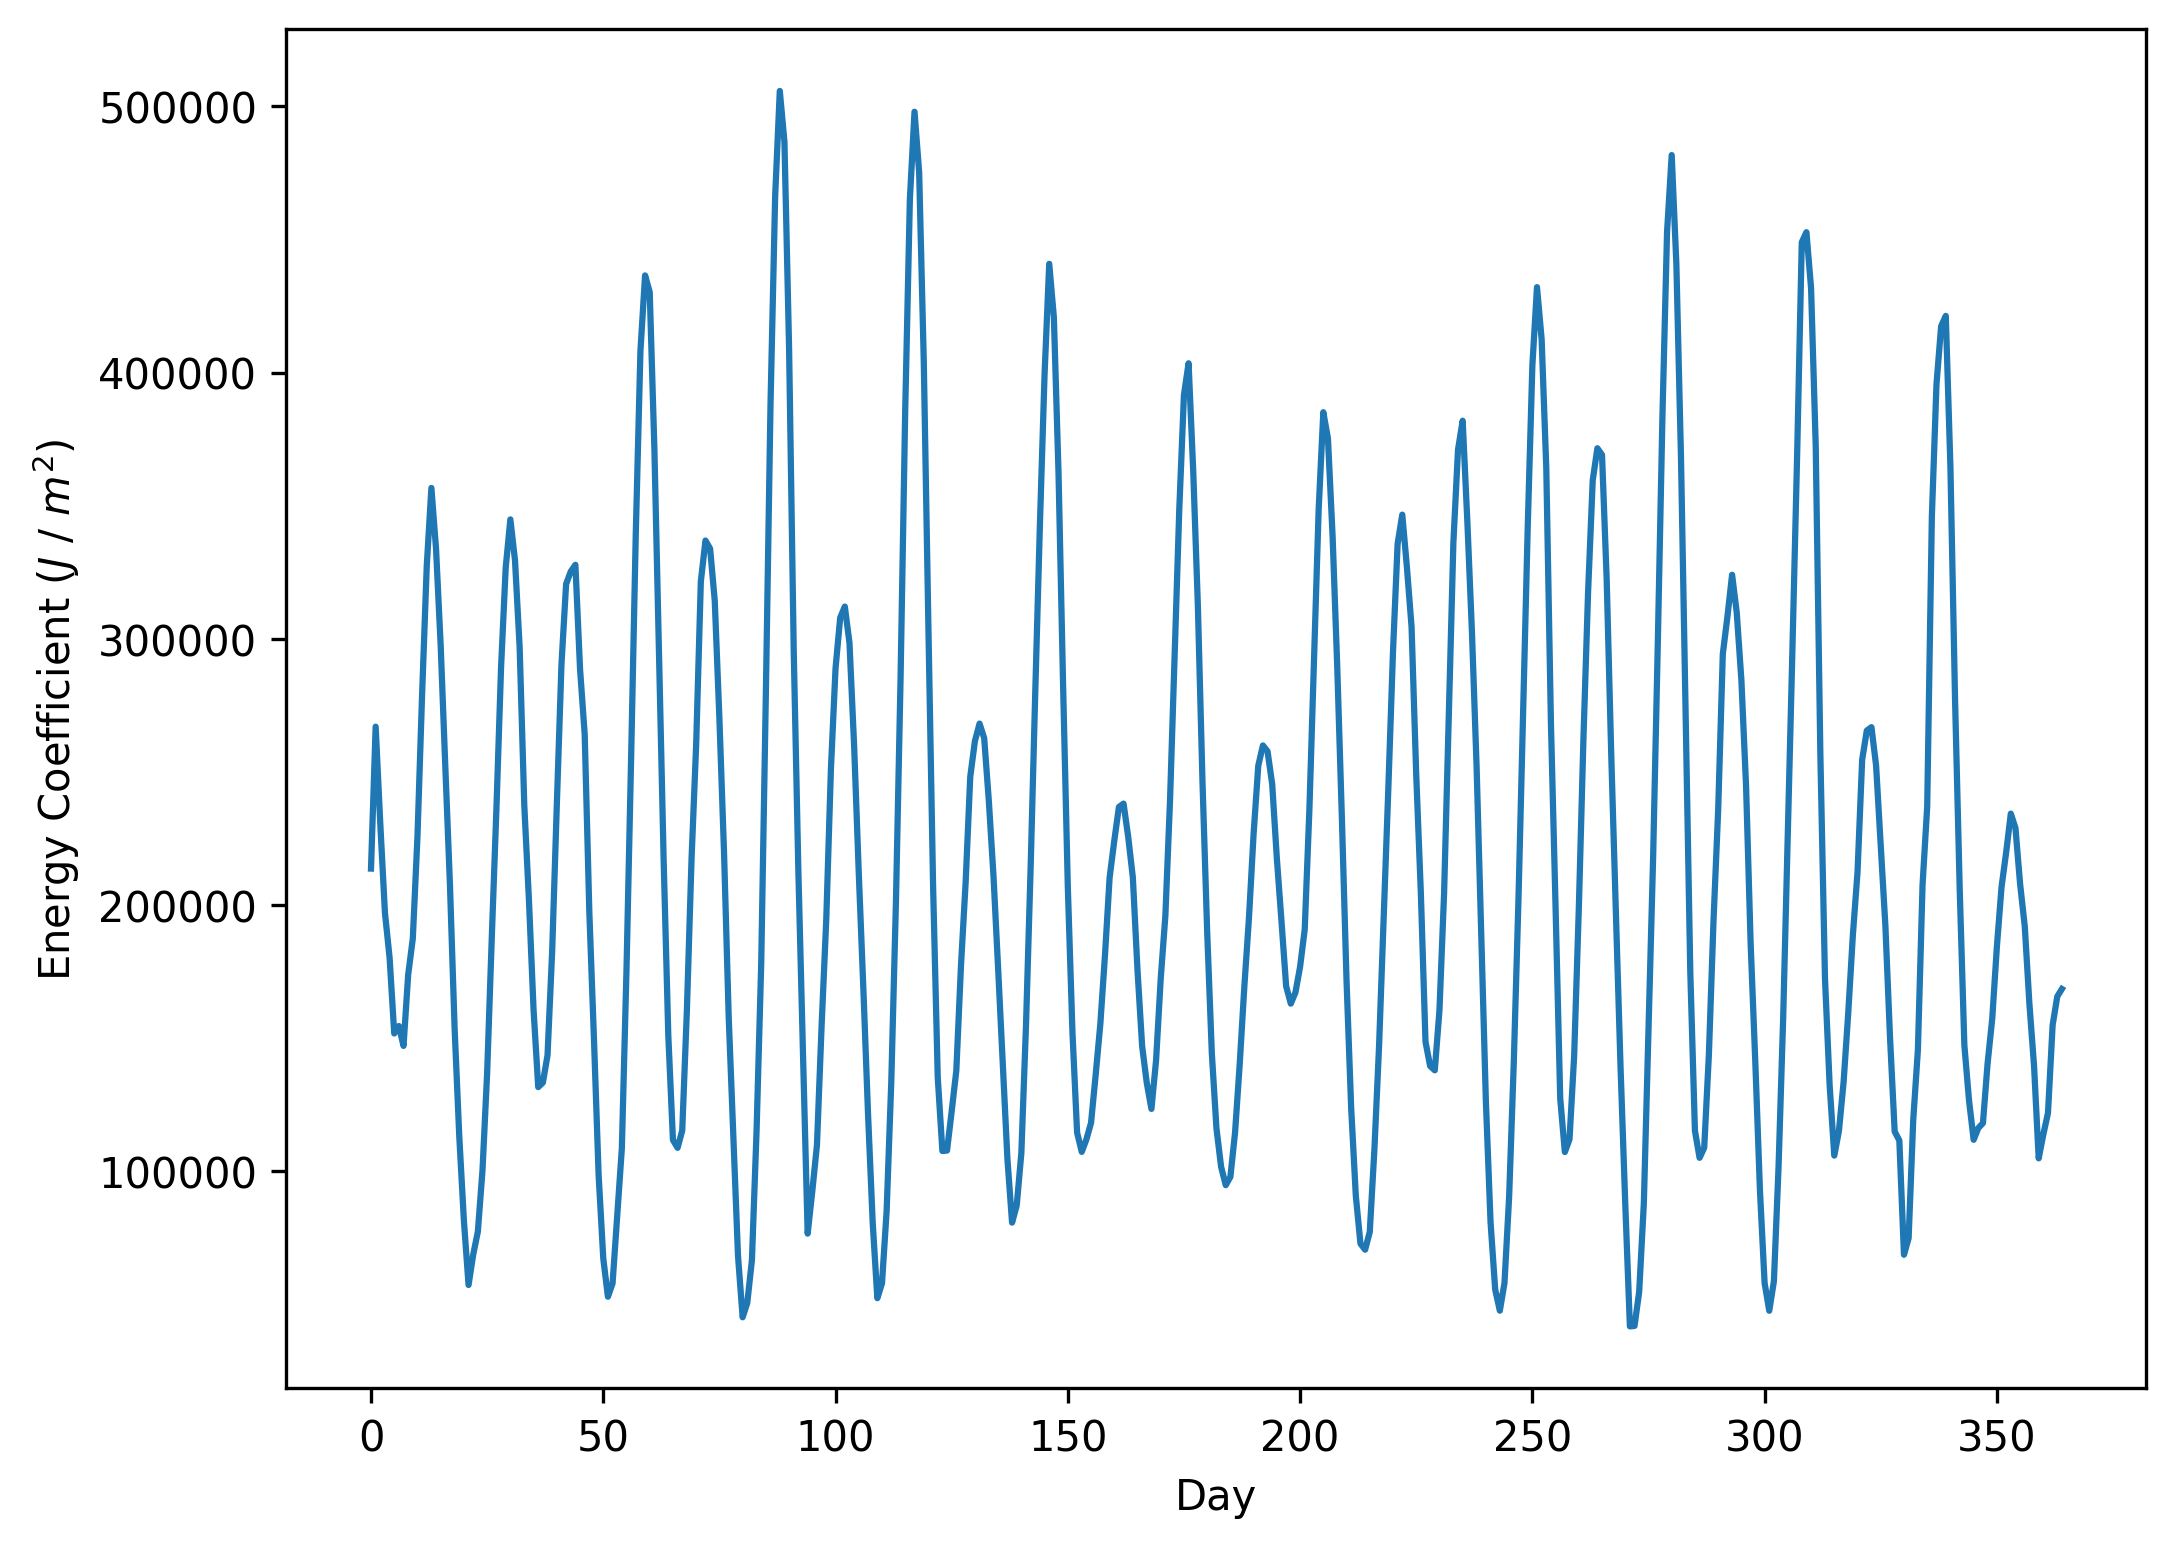

In [45]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(np.arange(0, 365), coefficients)
plt.xlabel("Day")
plt.ylabel("Energy Coefficient ($J$ / $m^2$)")

In [183]:
len(coefficients)

365

In [184]:
for i in range(365):
    print(coefficients[i])

213651.6196400214
266973.5130326499
230442.2495687271
197054.82346693642
180208.92144348507
151707.1259568243
154510.16739490067
147041.42816326715
173732.9860067393
187400.97291069015
225618.65624554348
279137.5515130219
327334.96556712035
356655.66686936625
333830.57995345636
297383.1391126355
251785.46011936275
207301.55797864404
153537.41617189825
113087.5361603053
81283.6012333185
57224.490846619294
68609.9610724805
77261.07857615258
100300.13514598849
136809.54043291908
187731.3079300924
236185.6981732098
289308.92735866294
326792.2597983758
344840.12465152604
329408.39209645265
296753.5821594767
237302.63546485346
201773.5212727558
160417.16059186906
131564.93998042715
133264.50198995444
143509.5267155169
182675.76265938114
237556.07956765845
290325.5268335423
320561.5787039073
325251.91945306916
327773.3529309377
288627.85205334396
264157.03742400056
197309.92427917427
149432.42074928083
98523.70776347847
67193.96463936711
52815.60179335226
57805.48896919837
83454.35434332085
1